# CORONA VIRUS RELATED VISUALS
Prepared by: Umut Can YILDIZ

## This notebook contains the visual information about the corona virus data obtained by using the following link:
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#COVID19_line_list_data.csv

NOTE: This is not a scientific report. It is just me (a beginner python user) preparing some visuals for my coronavirus presentation.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [3]:
%matplotlib inline
sns.set_style("darkgrid")
init_notebook_mode(connected=True)

# COVID-19_DATA

In [4]:
covid_19 = pd.read_csv("covid_19_data.csv")

In [5]:
covid_19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


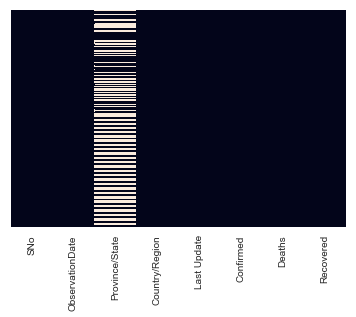

In [6]:
sns.heatmap(covid_19.isnull(), yticklabels=False, cbar=False)

In [7]:
covid_19["Last Update"] = pd.to_datetime(covid_19["Last Update"])
covid_19["ObservationDate"] = pd.to_datetime(covid_19["ObservationDate"])

In [8]:
covid_19.rename(columns={"Confirmed":"Cumulated Confirmed", "Deaths":"Cumulated Deaths",
                        "Recovered":"Cumulated Recovered"}, inplace=True)

In [9]:
covid_19["Still Infected"] = covid_19["Cumulated Confirmed"]-covid_19["Cumulated Deaths"]-covid_19["Cumulated Recovered"]

In [10]:
covid_19.set_index("ObservationDate", inplace=True)

In [11]:
covid_19.drop("SNo", axis=1, inplace=True)
covid_19.head()

,Province/State,Country/Region,Last Update,Cumulated Confirmed,Cumulated Deaths,Cumulated Recovered,Still Infected
ObservationDate,,,,,,,
2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,14.0
2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,6.0
2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,0.0


# EDA

In [12]:
# World Condition as of 1st of April
covid_country = covid_19.loc["2020-04-16"].groupby("Country/Region").sum()
covid_country.head()

,Cumulated Confirmed,Cumulated Deaths,Cumulated Recovered,Still Infected
Country/Region,,,,
Afghanistan,840.0,30.0,54.0,756.0
Albania,518.0,26.0,277.0,215.0
Algeria,2268.0,348.0,783.0,1137.0
Andorra,673.0,33.0,169.0,471.0
Angola,19.0,2.0,5.0,12.0


In [13]:
#Sort the countries by the confirmed case values
covid_country_grouped = covid_country.sort_values(by="Cumulated Confirmed", ascending=False)

# The below table shows the cumulative results of the first 20 countries that are most affected by the corona virus until 16th of April

In [14]:
# Create a new data frame containing the first 20 rows of the sorted dataframe
covid_country_grouped_20 = covid_country_grouped.head(20).reset_index()
covid_country_grouped_10 = covid_country_grouped.head(10).reset_index()
covid_country_grouped_20

,Country/Region,Cumulated Confirmed,Cumulated Deaths,Cumulated Recovered,Still Infected
0,US,667801.0,32916.0,54703.0,580182.0
1,Spain,184948.0,19315.0,74797.0,90836.0
2,Italy,168941.0,22170.0,40164.0,106607.0
3,France,147091.0,17941.0,33327.0,95823.0
4,Germany,137698.0,4052.0,77000.0,56646.0
5,UK,104145.0,13759.0,375.0,90011.0
6,Mainland China,82341.0,3342.0,77900.0,1099.0
7,Iran,77995.0,4869.0,52229.0,20897.0
8,Turkey,74193.0,1643.0,7089.0,65461.0
9,Belgium,34809.0,4857.0,7562.0,22390.0


In [15]:
fig = go.Figure(data=[
    go.Bar(name='Total Cases', x=covid_country_grouped_20["Country/Region"], y=covid_country_grouped_20["Cumulated Confirmed"]),
    go.Bar(name='Total Deaths', x=covid_country_grouped_20["Country/Region"], y=covid_country_grouped_20["Cumulated Deaths"]),
    go.Bar(name='Total Recovered', x=covid_country_grouped_20["Country/Region"], y=covid_country_grouped_20["Cumulated Recovered"]),
    go.Bar(name='Total Active', x=covid_country_grouped_20["Country/Region"], y=covid_country_grouped_20["Still Infected"]),

])
# Change the bar mode
fig.update_layout(barmode='relative',
                  title='Total Values Comparison (Relatively) of the first 20 Countries')
fig.show()

In [16]:
fig = go.Figure(data=[
    go.Bar(name='Total Cases', x=covid_country_grouped_20["Country/Region"], y=covid_country_grouped_20["Cumulated Confirmed"]),
    go.Bar(name='Total Deaths', x=covid_country_grouped_20["Country/Region"], y=covid_country_grouped_20["Cumulated Deaths"]),
    go.Bar(name='Total Recovered', x=covid_country_grouped_20["Country/Region"], y=covid_country_grouped_20["Cumulated Recovered"]),
    go.Bar(name='Total Active', x=covid_country_grouped_20["Country/Region"], y=covid_country_grouped_20["Still Infected"]),

])
# Change the bar mode
fig.update_layout(barmode='group',
                 title='Total Values Comparison of the first 20 Countries')
fig.show()

In [17]:
fig = go.Figure(data=[
    go.Bar(name='Total Cases', x=covid_country_grouped_10["Country/Region"], y=covid_country_grouped_10["Cumulated Confirmed"]),
    go.Bar(name='Total Deaths', x=covid_country_grouped_10["Country/Region"], y=covid_country_grouped_10["Cumulated Deaths"]),
    go.Bar(name='Total Recovered', x=covid_country_grouped_10["Country/Region"], y=covid_country_grouped_10["Cumulated Recovered"]),
    go.Bar(name='Total Active', x=covid_country_grouped_10["Country/Region"], y=covid_country_grouped_10["Still Infected"]),

])
# Change the bar mode
fig.update_layout(barmode='group',
                 title='Total Values Comparison of the first 10 Countries')
fig.show()

# The following code generates daily results

In [18]:
df = covid_19.reset_index().groupby("ObservationDate").sum().reset_index()

In [19]:
df.head()

,ObservationDate,Cumulated Confirmed,Cumulated Deaths,Cumulated Recovered,Still Infected
0,2020-01-22,555.0,17.0,28.0,510.0
1,2020-01-23,653.0,18.0,30.0,605.0
2,2020-01-24,941.0,26.0,36.0,879.0
3,2020-01-25,1438.0,42.0,39.0,1357.0
4,2020-01-26,2118.0,56.0,52.0,2010.0


In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df["ObservationDate"], y=df["Cumulated Confirmed"],
                    mode='lines',
                    name='Confirmed'))

fig.add_trace(go.Scatter(x=df["ObservationDate"], y=df["Cumulated Deaths"],
                    mode='lines',
                    name='Deaths'))

fig.add_trace(go.Scatter(x=df["ObservationDate"], y=df["Cumulated Recovered"],
                    mode='lines',
                    name='Recovered'))

fig.add_trace(go.Scatter(x=df["ObservationDate"], y=df["Still Infected"],
                    mode='lines',
                    name='Still Infected'))
fig.update_layout(title='Total Values in World (Day by Day)')

fig.show()

# What about Turkey?

In [21]:
df_turkey = covid_19[covid_19["Country/Region"]=="Turkey"].reset_index()
df_turkey.drop(["Province/State","Last Update"], axis=1, inplace=True)
df_turkey.head(30)

,ObservationDate,Country/Region,Cumulated Confirmed,Cumulated Deaths,Cumulated Recovered,Still Infected
0,2020-03-11,Turkey,1.0,0.0,0.0,1.0
1,2020-03-12,Turkey,1.0,0.0,0.0,1.0
2,2020-03-13,Turkey,5.0,0.0,0.0,5.0
3,2020-03-14,Turkey,5.0,0.0,0.0,5.0
4,2020-03-15,Turkey,6.0,0.0,0.0,6.0
5,2020-03-16,Turkey,18.0,0.0,0.0,18.0
6,2020-03-17,Turkey,47.0,1.0,0.0,46.0
7,2020-03-18,Turkey,98.0,1.0,0.0,97.0
8,2020-03-19,Turkey,192.0,3.0,0.0,189.0
9,2020-03-20,Turkey,359.0,4.0,0.0,355.0


In [22]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_turkey["ObservationDate"], y=df_turkey["Cumulated Confirmed"],
                    mode='lines',
                    name='Confirmed'))

fig.add_trace(go.Scatter(x=df_turkey["ObservationDate"], y=df_turkey["Cumulated Deaths"],
                    mode='lines',
                    name='Deaths'))

fig.add_trace(go.Scatter(x=df_turkey["ObservationDate"], y=df_turkey["Cumulated Recovered"],
                    mode='lines',
                    name='Recovered'))

fig.add_trace(go.Scatter(x=df_turkey["ObservationDate"], y=df_turkey["Still Infected"],
                    mode='lines',
                    name='Still Infected'))
fig.update_layout(title='Total Values in Turkey (Day by Day)')

fig.show()

# Now, let's examine the monthly results

In [23]:
df_jan = df[df["ObservationDate"]=="2020-01-31"]
df_feb = df[df["ObservationDate"]=="2020-02-29"]
df_mar = df[df["ObservationDate"]=="2020-03-31"]
df_apr = df[df["ObservationDate"]=="2020-04-16"]

In [24]:
df_by_month = pd.concat([df_jan, df_feb, df_mar, df_apr], ignore_index=True, axis=0)
df_by_month["Month"]= (df_by_month["ObservationDate"].apply(lambda date: date.month))

In [25]:
df_by_month.drop("ObservationDate", axis=1, inplace=True)

In [26]:
df_by_month.rename(index={0: "Jan", 1: "Feb", 2: "Mar", 3: "Apr"}, inplace=True)
df_by_month.rename_axis("Cumulated by Month", inplace=True)
df_by_month

,Cumulated Confirmed,Cumulated Deaths,Cumulated Recovered,Still Infected,Month
Cumulated by Month,,,,,
Jan,9925.0,213.0,222.0,9490.0,1
Feb,86013.0,2941.0,39782.0,43290.0,2
Mar,857487.0,42107.0,178028.0,637352.0,3
Apr,2152647.0,143801.0,542107.0,1466739.0,4


In [27]:
fig = go.Figure(data=[
    go.Bar(name='Total Cases', x=df_by_month["Month"], y=df_by_month["Cumulated Confirmed"]),
    go.Bar(name='Total Deaths', x=df_by_month["Month"], y=df_by_month["Cumulated Deaths"]),
    go.Bar(name='Total Recovered', x=df_by_month["Month"], y=df_by_month["Cumulated Recovered"]),
    go.Bar(name='Total Active', x=df_by_month["Month"], y=df_by_month["Still Infected"]),

])
# Change the bar mode
fig.update_layout(barmode='group',
                 title="Total Values of the World by Month")
fig.show()

# Now, let's look at the World Map

But before, let me arrange my table a little bit

In [28]:
def useTheOriginalNamePlease(x):
    
    if x == "Mainland China":
        x = "China"
        return x
    elif x =="US":
        x = "United States"
        return x
    else:
        return x

In [29]:
covid_19["Country/Region"] = covid_19["Country/Region"].apply(lambda x: useTheOriginalNamePlease(x))

In [30]:
covid_19.head()

,Province/State,Country/Region,Last Update,Cumulated Confirmed,Cumulated Deaths,Cumulated Recovered,Still Infected
ObservationDate,,,,,,,
2020-01-22,Anhui,China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
2020-01-22,Beijing,China,2020-01-22 17:00:00,14.0,0.0,0.0,14.0
2020-01-22,Chongqing,China,2020-01-22 17:00:00,6.0,0.0,0.0,6.0
2020-01-22,Fujian,China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
2020-01-22,Gansu,China,2020-01-22 17:00:00,0.0,0.0,0.0,0.0


In [31]:
covid_by_country = covid_19.loc["2020-04-16"].groupby("Country/Region").sum().reset_index()

In [32]:
covid_by_country.head()

,Country/Region,Cumulated Confirmed,Cumulated Deaths,Cumulated Recovered,Still Infected
0,Afghanistan,840.0,30.0,54.0,756.0
1,Albania,518.0,26.0,277.0,215.0
2,Algeria,2268.0,348.0,783.0,1137.0
3,Andorra,673.0,33.0,169.0,471.0
4,Angola,19.0,2.0,5.0,12.0


In [33]:
data1 = dict(type="choropleth",
        locations=covid_by_country["Country/Region"],
        locationmode="country names",
        z=covid_by_country["Cumulated Confirmed"],
        text=covid_by_country["Country/Region"],
        colorbar={"title":"Total Cases"}
        )
data2 = dict(type="choropleth",
        locations=covid_by_country["Country/Region"],
        locationmode="country names",
        z=covid_by_country["Cumulated Deaths"],
        text=covid_by_country["Country/Region"],
        colorbar={"title":"Total Deaths"}
        )

In [34]:
layout1 = dict(title="Total Cases in the World",
             geo=dict(showframe=False, projection={"type":"natural earth"}))
layout2 = dict(title="Total Deaths in the World",
             geo=dict(showframe=False, projection={"type":"natural earth"}))

In [35]:
fig = go.Figure(data=[data1], layout=layout1)
iplot(fig, validate=False)

In [36]:
fig2 = go.Figure(data=[data2], layout=layout2)
iplot(fig2, validate=False)

In [37]:
covid_19.reset_index(inplace=True)
covid_19.head()

,ObservationDate,Province/State,Country/Region,Last Update,Cumulated Confirmed,Cumulated Deaths,Cumulated Recovered,Still Infected
0,2020-01-22,Anhui,China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
1,2020-01-22,Beijing,China,2020-01-22 17:00:00,14.0,0.0,0.0,14.0
2,2020-01-22,Chongqing,China,2020-01-22 17:00:00,6.0,0.0,0.0,6.0
3,2020-01-22,Fujian,China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
4,2020-01-22,Gansu,China,2020-01-22 17:00:00,0.0,0.0,0.0,0.0


In [38]:
df = covid_19.groupby(["ObservationDate", "Country/Region"]).sum().reset_index()

In [39]:
fig = px.choropleth(df, locations="Country/Region", locationmode='country names',
                    color=np.log(df["Cumulated Confirmed"]), 
                    hover_name = "Country/Region",
                    hover_data= ["Cumulated Confirmed", "Cumulated Deaths", "Cumulated Recovered", "Still Infected"],
                    animation_frame=df["ObservationDate"].dt.strftime('%Y-%m-%d'),
                    title='Total Cases day by day',
                    color_continuous_scale=px.colors.sequential.Magenta
                   )
fig.update(layout_coloraxis_showscale=False)
fig.show()

C:\Users\yldzu\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning:

divide by zero encountered in log



# Here, I will try to find symptoms related to corona virus using the following file (again obtained from the same link at the top)

Symptoms are obtained from the confirmed cases in Japan and it may not reflect the real situation since there are lots of empty values. However, I think it will give you an idea about what the symptoms would be.

In [40]:
d = pd.read_csv("COVID19_line_list_data.csv")

In [41]:
d.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


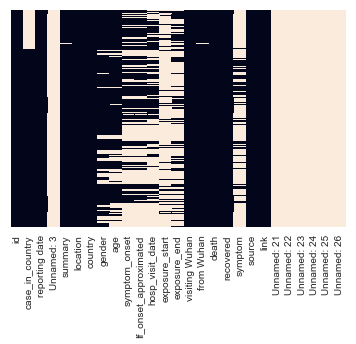

In [42]:
sns.heatmap(d.isnull(), yticklabels=False, cbar=False)

In [43]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
Unnamed: 3               0 non-null float64
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_start           128 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
symptom                  270 non-null object
source                   108

In [44]:
def isTrue(x):
    
    if x==True:
        return (not x)
    else:
        return (not x)
log = d["symptom"].isnull().apply(lambda x: isTrue(x))

In [45]:
log.value_counts()

False    815
True     270
Name: symptom, dtype: int64

In [46]:
symp =pd.DataFrame(d[log]["symptom"].value_counts().sort_values(ascending=False).head(10))
symp.rename(columns={"symptom":"Count"}, inplace=True)
symp.rename_axis("Symptoms", inplace=True)
symp.reset_index(inplace=True)

In [47]:
px.bar(symp, x="Symptoms", y="Count", title="Symptoms obtained from the confirmed cases in Japan")